In [33]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

In [34]:
# Load breast cancer dataset
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
df = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)
df['target'] = cancer.target

df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [35]:
# Print all features
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [36]:
# Split dataset into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df.drop('target', axis=1), df['target'], stratify=df['target'], random_state=42)

# Initialize decision tree classifier
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=0)

# Train the decision tree classifier
tree.fit(X_train, y_train)

# Evaluate the model
print('Accuracy on training set: {:.3f}'.format(tree.score(X_train, y_train)))
print('Accuracy on test set: {:.3f}'.format(tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.937


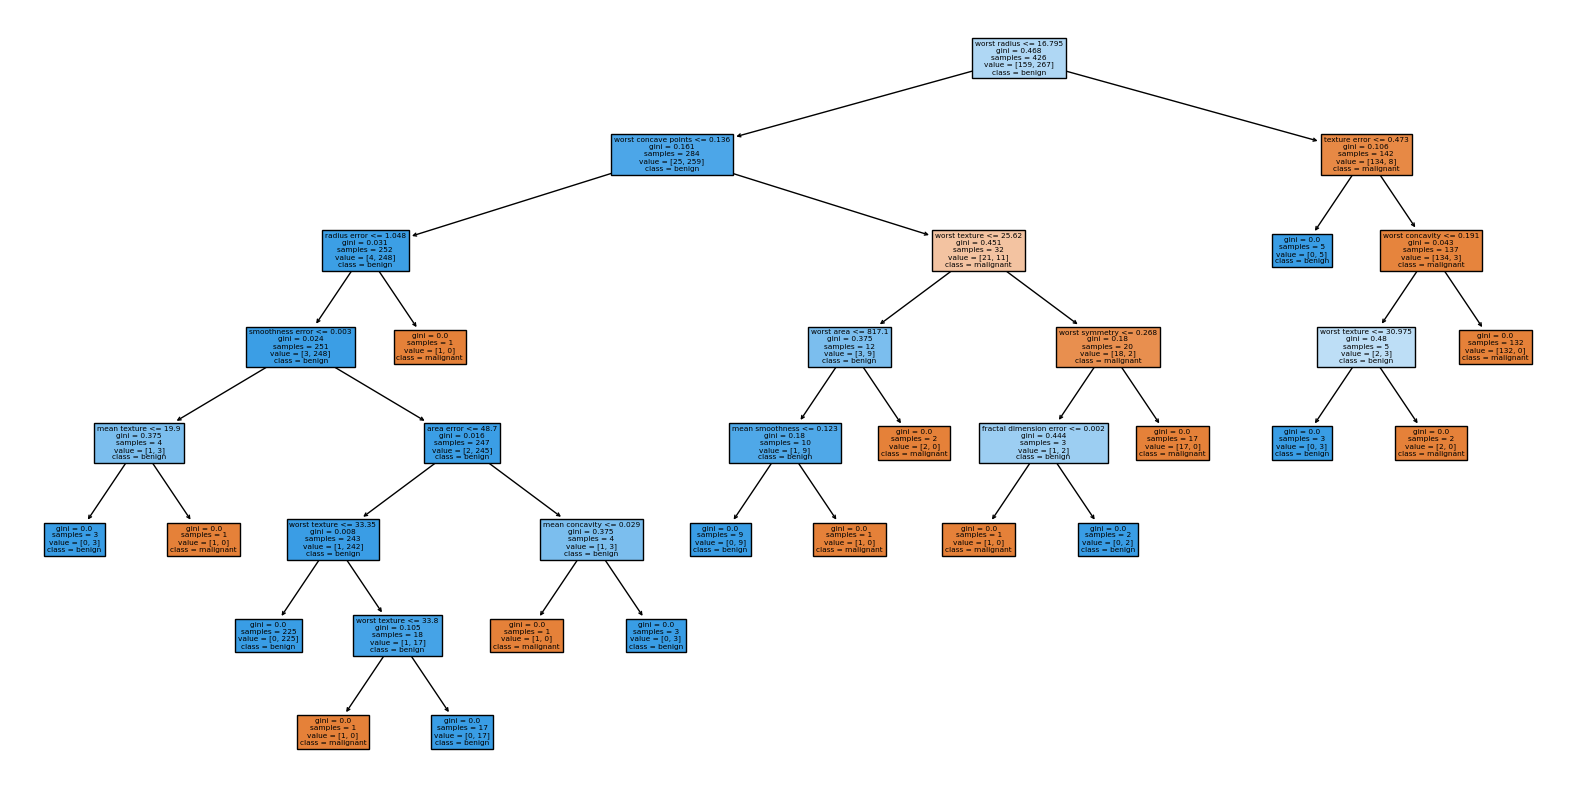

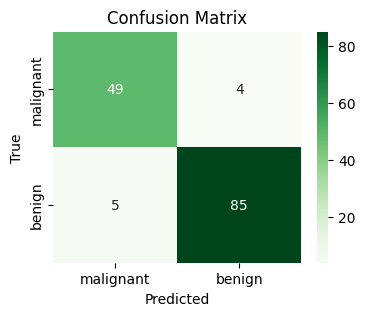

In [37]:
# Visualize the decision tree
from sklearn.tree import plot_tree
plt.figure(figsize=(20,10))
plot_tree(tree, filled=True, feature_names=cancer.feature_names, class_names=cancer.target_names)
plt.show()

# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Predict test set labels
y_pred = tree.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=cancer.target_names, yticklabels=cancer.target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


Accuracy on training set: 0.988
Accuracy on test set: 0.951


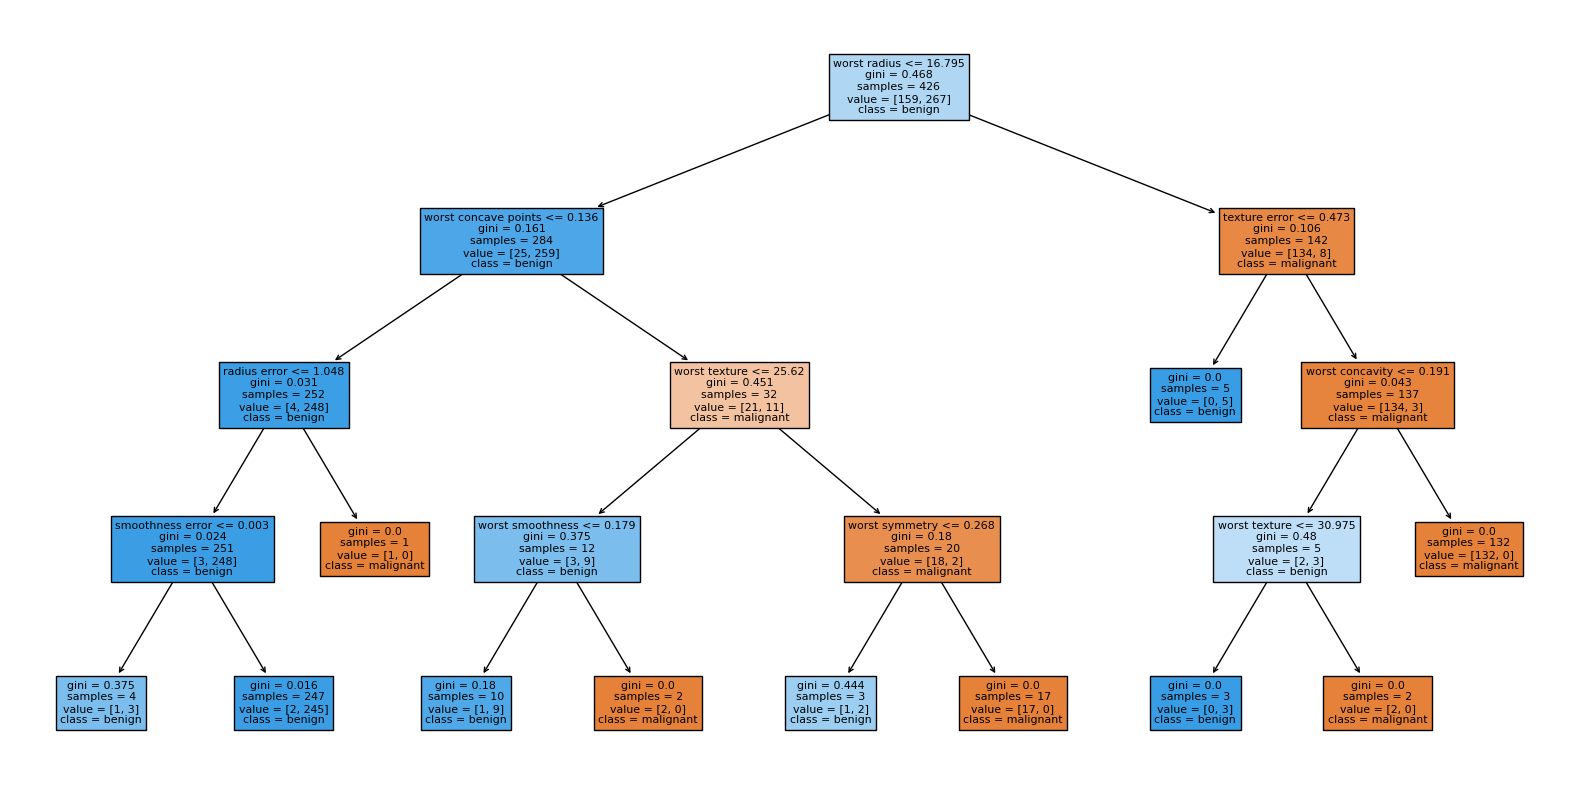

In [38]:
# Pre-pruning: Max-depth = 4
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)
print('Accuracy on training set: {:.3f}'.format(tree.score(X_train, y_train)))
print('Accuracy on test set: {:.3f}'.format(tree.score(X_test, y_test)))

# Plot decision tree
plt.figure(figsize=(20, 10))
plot_tree(tree, filled=True, feature_names=cancer.feature_names, class_names=['malignant', 'benign'])
plt.show()

Feature importances:
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


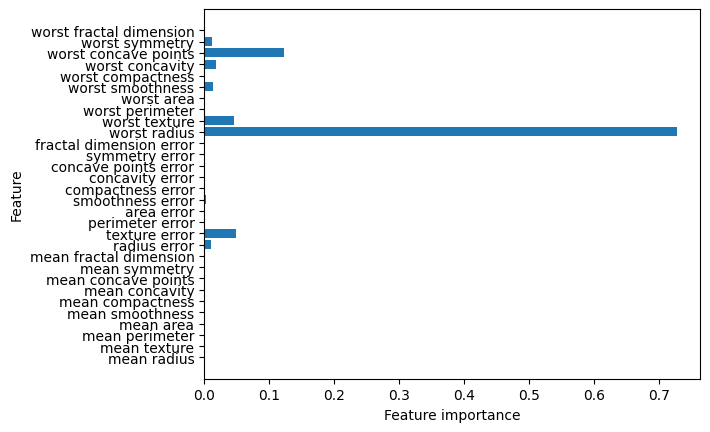

In [39]:
#Feature importance
print('Feature importances:\n{}'.format(tree.feature_importances_))

def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')
plot_feature_importances_cancer(tree)